Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200] [29.2785, 72.1168, 119.6182, 170.5478, 224.4662, 282.2224, 336.6142, 396.033, 456.6079, 518.9043, 579.4096, 645.8561, 709.0763, 771.11, 839.6319, 903.857, 971.7511, 1035.9976, 1106.696, 1174.0853] [50, 117, 190, 262, 341, 425, 499, 581, 668, 755, 837, 926, 1016, 1096, 1196, 1279, 1376, 1461, 1566, 1641]


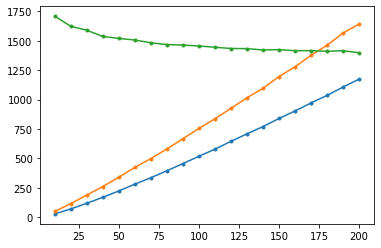

In [3]:
!pip install matplotlib

import random
import matplotlib.pyplot as plt
import numpy as np
#import scipy as sc
#import sympy as sp

def calc_run(N):
    S = set(range(N))
    k=0
    while S:
        a = random.randint(0,N-1)
        k+=1
        if a in S:
            S.remove(a)
    return k

def test1():
    X,Y,Y2 = [],[],[]
    T = 10000
    for N in range(10,201,10):
        k = 0
        K={}
        for t in range(T):
            v = calc_run(N)
            if v not in K:
                K[v]=0
            K[v]+=1
            k+=v
            
        k/=T
        X.append(N)
        Y.append(k)
        Lx = list(K.items())
        Lx.sort()
        #print N,k,Lx
        s95 = 0.95*sum([x[1] for x in Lx])
        rs1 = 0
        for k2,b in Lx:
            rs1 += b
            if rs1 >= s95:
                break
        Y2.append(k2)
    return X,Y,Y2

def plot1():
    X,Y,Y2 = test1()
    print (X,Y,Y2)
    plt.plot(X,Y,".-")
    plt.plot(X,Y2,".-")
    Y3 = []
    for k,k2 in zip(Y,Y2):
        Y3.append(1000*k2/k)
    plt.plot(X,Y3,".-")
plot1()